In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 6.8MB/s 
     |████████████████████████████████| 10.4MB 1.5MB/s 
     |████████████████████████████████| 14.7MB 209kB/s 


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas
import glob
import re

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
files = [f for f in glob.glob("/content/drive/My Drive/MAG/PythonLibraries/Coronavirus/covid19/*.csv")]

full_data = []
columns = ['Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']

for file in files:
  data = pd.read_csv(file, parse_dates=['Last Update'], usecols=columns)
  data["Date"] = re.search('covid19/(.+?)-2020.csv', file).group(1)
  full_data.append(data)

df = pd.concat(full_data, ignore_index=True); df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,01-22
1,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN,01-22
2,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN,01-22
3,Fujian,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,01-22
4,Gansu,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,01-22
...,...,...,...,...,...,...,...
2475,"Seattle, WA",US,2020-02-09 07:03:04,1.0,0.0,1.0,02-26
2476,"Tempe, AZ",US,2020-02-25 21:23:03,1.0,0.0,1.0,02-26
2477,"Lackland, TX (From Diamond Princess)",US,2020-02-24 23:33:02,0.0,0.0,0.0,02-26
2478,"Omaha, NE (From Diamond Princess)",US,2020-02-24 23:33:02,0.0,0.0,0.0,02-26


## Prepare data

In [0]:
df['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Malaysia', 'France',
       'Germany', 'Australia', 'United Arab Emirates', 'Vietnam',
       'Canada', 'Italy', 'UK', 'Russia', 'Nepal', 'Cambodia',
       'Sri Lanka', 'Finland', 'Philippines', 'India', 'Sweden', 'Mexico',
       'Brazil', 'Colombia', 'Ivory Coast', 'Spain', 'Others', 'Belgium',
       'Iran', 'Egypt', 'Israel', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria',
       'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece',
       'North Macedonia', 'Norway', 'Romania'], dtype=object)

In [5]:
df['Confirmed'].fillna(0, axis = 0, inplace = True)
df['Deaths'].fillna(0, axis = 0, inplace = True)
df['Recovered'].fillna(0, axis = 0, inplace = True)

df['Confirmed'] = pd.to_numeric(df['Confirmed'])
df['Deaths'] = pd.to_numeric(df['Deaths'])
df['Recovered'] = pd.to_numeric(df['Recovered'])

df.tail(40)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
2440,South Australia,Australia,2020-02-17 08:13:09,2.0,0.0,2.0,02-26
2441,NaN,Austria,2020-02-26 00:13:06,2.0,0.0,0.0,02-26
2442,NaN,Finland,2020-02-26 19:03:08,2.0,0.0,1.0,02-26
2443,NaN,Israel,2020-02-26 20:33:02,2.0,0.0,0.0,02-26
2444,NaN,Lebanon,2020-02-26 19:33:02,2.0,0.0,0.0,02-26
2445,NaN,Pakistan,2020-02-26 23:53:02,2.0,0.0,0.0,02-26
2446,NaN,Russia,2020-02-12 14:43:03,2.0,0.0,2.0,02-26
2447,NaN,Sweden,2020-02-26 18:53:02,2.0,0.0,0.0,02-26
2448,"Chicago, IL",US,2020-02-09 19:03:03,2.0,0.0,2.0,02-26
2449,"San Benito, CA",US,2020-02-03 03:53:02,2.0,0.0,0.0,02-26


In [6]:
df.describe()

,Confirmed,Deaths,Recovered
count,2480.000000,2480.000000,2480.000000
mean,587.742339,15.790323,109.624194
std,4842.098025,163.119253,947.909299
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,12.000000,0.000000,1.000000
75%,124.000000,1.000000,16.000000
max,65187.000000,2615.000000,20969.000000


In [7]:
df.describe(include = ['object'])

,Province/State,Country/Region,Date
count,1778,2480,2480
unique,72,52,36
top,Xinjiang,Mainland China,02-26
freq,36,1110,101


## General tendation

In [8]:
group_full_data = df.groupby(['Date']).sum().reset_index()
print(group_full_data)

     Date  Confirmed  Deaths  Recovered
0   01-22      555.0    17.0       28.0
1   01-23      653.0    18.0       30.0
2   01-24      941.0    26.0       36.0
3   01-25     1438.0    42.0       39.0
4   01-26     2118.0    56.0       52.0
5   01-27     2927.0    82.0       61.0
6   01-28     5578.0   131.0      107.0
7   01-29     6165.0   133.0      126.0
8   01-30     8235.0   171.0      143.0
9   01-31     9925.0   213.0      222.0
10  02-01    12038.0   259.0      284.0
11  02-02    16787.0   362.0      472.0
12  02-03    19881.0   426.0      623.0
13  02-04    23892.0   492.0      852.0
14  02-05    27636.0   564.0     1124.0
15  02-06    30818.0   634.0     1487.0
16  02-07    34392.0   719.0     2011.0
17  02-08    37121.0   806.0     2616.0
18  02-09    40151.0   906.0     3244.0
19  02-10    42763.0  1013.0     3946.0
20  02-11    44803.0  1113.0     4683.0
21  02-12    45222.0  1118.0     5150.0
22  02-13    60370.0  1371.0     6295.0
23  02-14    66887.0  1523.0     8058.0


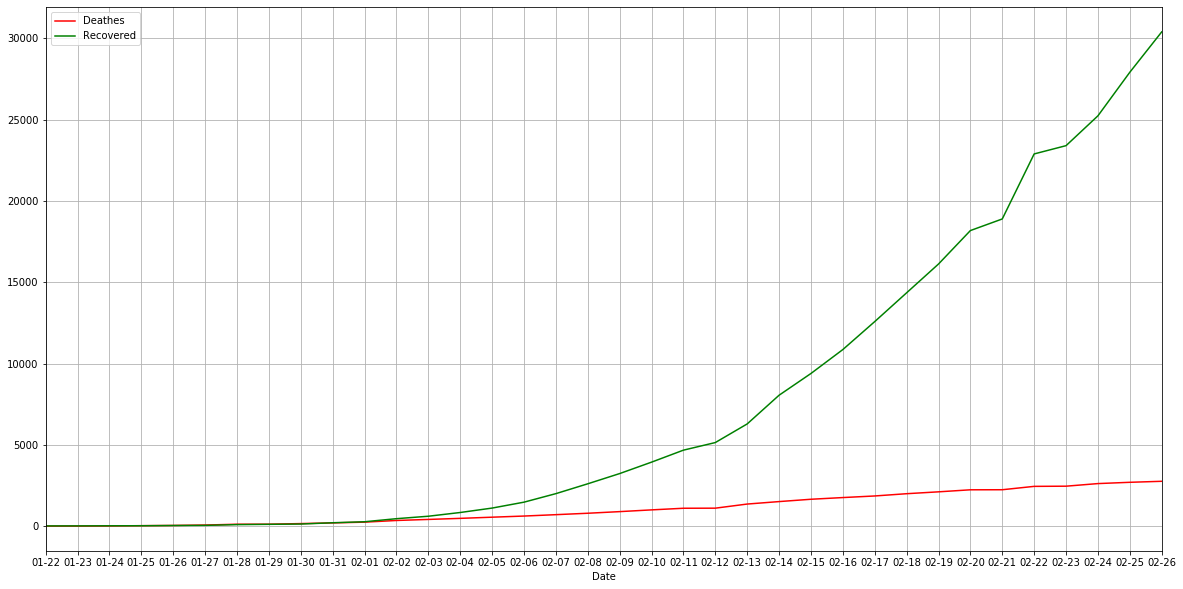

In [0]:
plt.figure(figsize = (20, 10))

plt.plot(group_full_data['Date'], group_full_data['Deaths'], 'r', label = 'Deathes')
plt.plot(group_full_data['Date'], group_full_data['Recovered'], 'g', label = 'Recovered')
#plt.plot(group_full_data['Date'], group_full_data['Confirmed'], 'b')

plt.xlabel('Date')
plt.xticks(range(99))
plt.xlim(0, 35)
plt.legend()
plt.grid()
pass

No handles with labels found to put in legend.


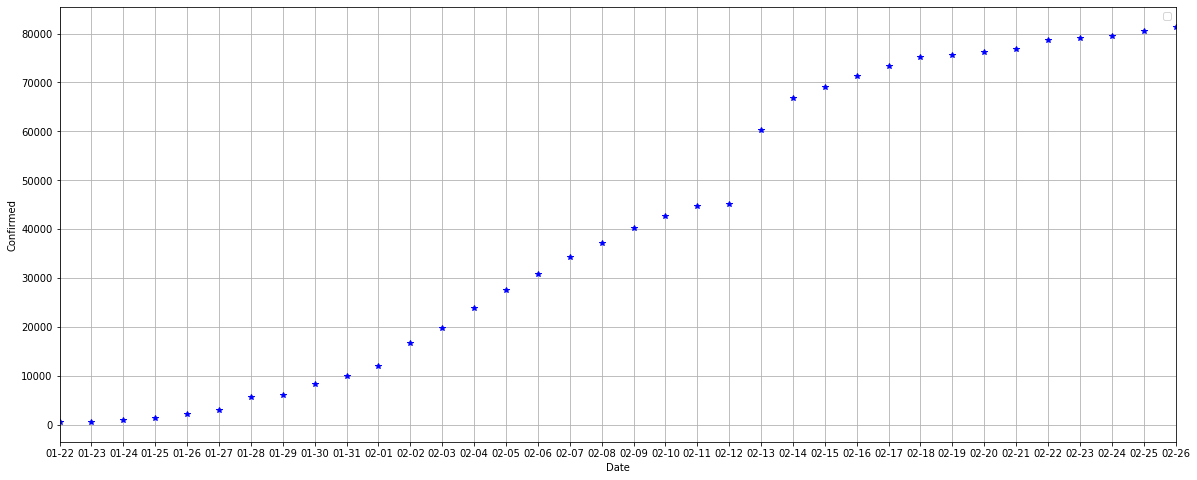

In [0]:
plt.figure(figsize = (20, 8))
plt.plot(group_full_data['Date'], group_full_data['Confirmed'], 'b*')

plt.xlabel('Date')
plt.xticks(range(99))
plt.xlim(0, 35)
plt.ylabel('Confirmed')
plt.legend()
plt.grid()
pass

Количество зараженных продолжает расти. 
А с 21 февраля резкое увеличение количества выживших при этом в эти даты количество смертей примерно одинаково от 2200 до 2600. Тоесть прирост летальных исходов сокращается с каждым днём.
На конец фераля по всему миру насчитывается 80000 зараженных короновирусом, из которых 30000 выздоровели и около 2700 человек умерли. Тоесть на данный момент выздоровевших 37,5% от общего числа зараженных, а летальных исходов 3,37%.

Теперь давайте посмотрим отдельно по странам сколько всего случаев заражения вирусом.

## By countries

In [0]:
cases_by_country = df.groupby(['Country/Region']).mean().reset_index()
cases_by_country.sort_values(by='Confirmed', ascending=False, inplace=True)
cases_by_country

,Country/Region,Confirmed,Deaths,Recovered
28,Mainland China,1290.863964,35.046847,242.447748
35,Others,398.050000,0.950000,0.700000
41,South Korea,136.416667,1.138889,5.888889
19,Iran,48.875000,8.500000,6.125000
22,Italy,48.037037,1.296296,0.296296
24,Japan,48.027778,0.416667,7.555556
40,Singapore,44.571429,0.000000,14.571429
17,Hong Kong,36.861111,0.861111,2.916667
47,Thailand,25.083333,0.000000,9.416667
4,Bahrain,19.000000,0.000000,0.000000


Text(0.5, 1.0, 'Number of confirmed by country')

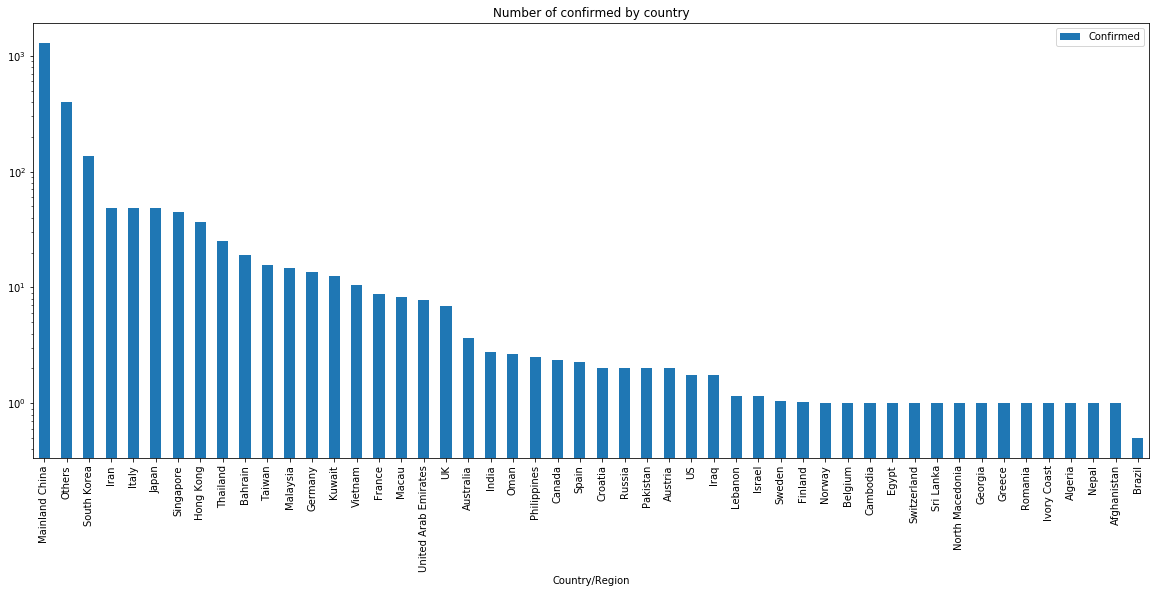

In [0]:
ax = cases_by_country[cases_by_country["Confirmed"] > 0].plot.bar(x='Country/Region', y='Confirmed', figsize=(20, 8))
ax.set_yscale('log')
ax.set_title('Number of confirmed by country')

Лидирует по количеству зараженных конечноже Китай, страна вирус в которой появился. Далее идут такие страны как Южная Корея, Иран, Италия, Япония, Сингапур. 

Text(0.5, 1.0, 'Number of DEATHS by country')

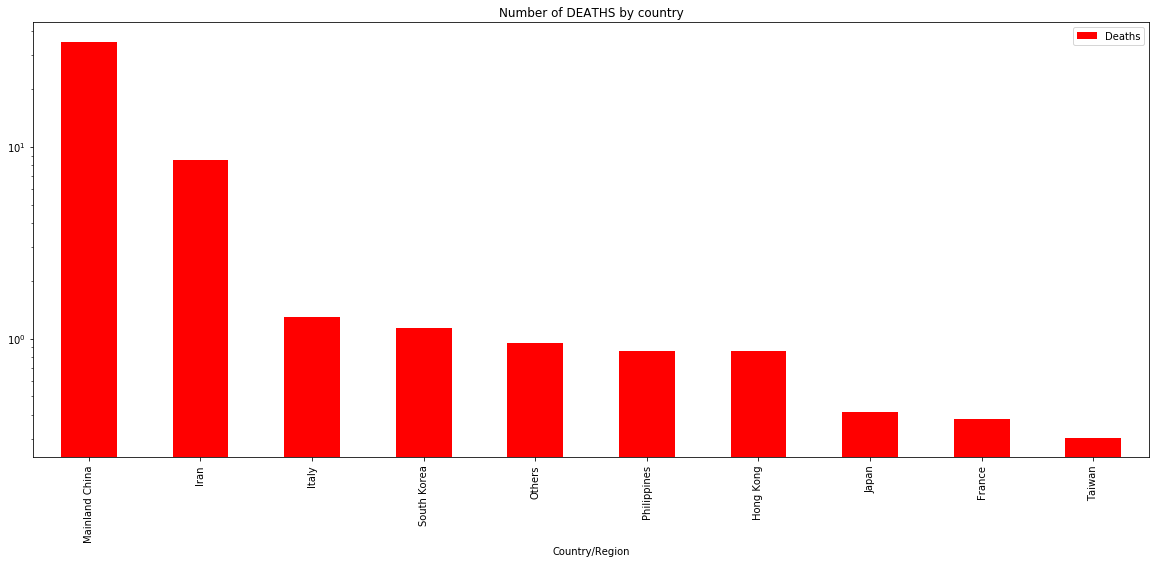

In [0]:
cases_by_country.sort_values(by='Deaths', ascending=False, inplace=True)
ax = cases_by_country[cases_by_country["Deaths"] > 0].plot.bar(x='Country/Region', y='Deaths', figsize=(20, 8), color='r')
ax.set_yscale('log')
ax.set_title('Number of DEATHS by country')

Text(0.5, 1.0, 'Number of RECOVERED by country')

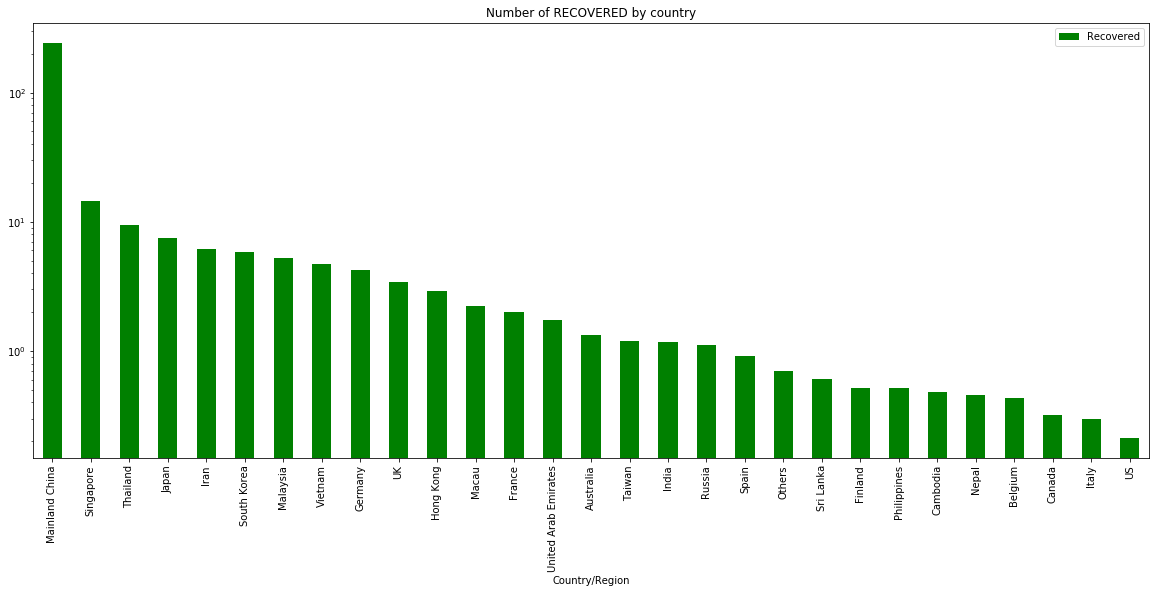

In [0]:
cases_by_country.sort_values(by='Recovered', ascending=False, inplace=True)
ax = cases_by_country[cases_by_country["Recovered"] > 0].plot.bar(x='Country/Region', y='Recovered', figsize=(20, 8), color='g')
ax.set_yscale('log')
ax.set_title('Number of RECOVERED by country')

Рассмотрим страны, в которых наибольшее количество смертей.

### Mainland China

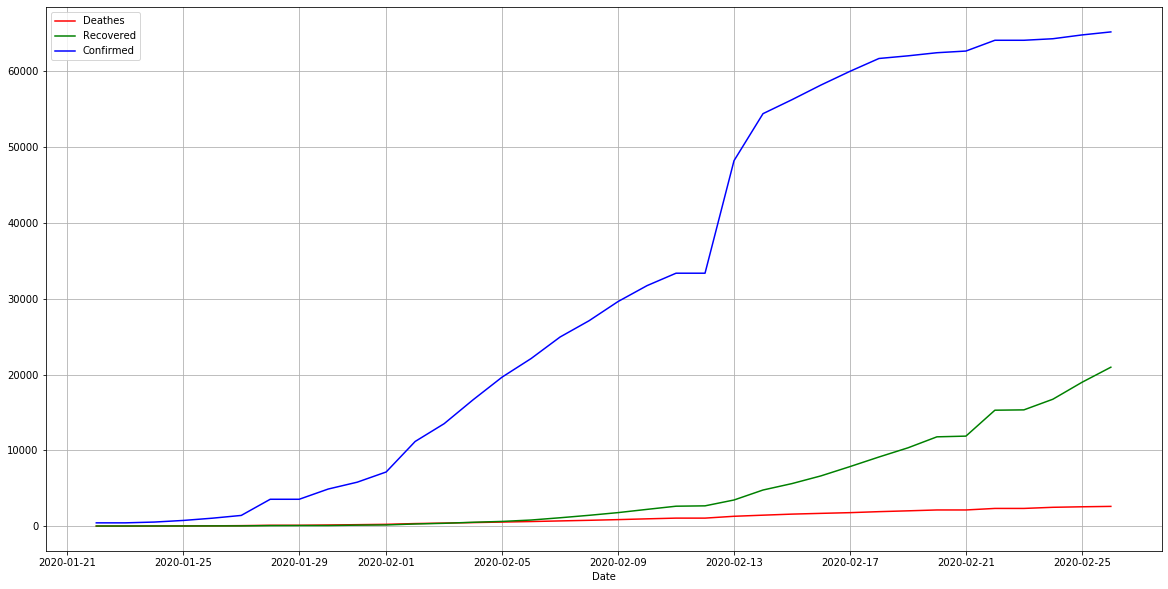

In [0]:
plt.figure(figsize = (20, 10))

plt.plot(location_timeseries['Hubei, Mainland China']['Deaths'], 'r', label = 'Deathes')
plt.plot(location_timeseries['Hubei, Mainland China']['Recovered'], 'g', label = 'Recovered')
plt.plot(location_timeseries['Hubei, Mainland China']['Confirmed'], 'b', label = 'Confirmed')

plt.xlabel('Date')
plt.legend()
plt.grid()
pass

Видно что количество зараженных стремительными темпами растёт. Радует то что количество выздоровевших людей во много раз привышает смертность. 

In [0]:
location_timeseries.keys()

dict_keys(['Anhui, Mainland China', 'Beijing, Mainland China', 'Chongqing, Mainland China', 'Fujian, Mainland China', 'Gansu, Mainland China', 'Guangdong, Mainland China', 'Guangxi, Mainland China', 'Guizhou, Mainland China', 'Hainan, Mainland China', 'Hebei, Mainland China', 'Heilongjiang, Mainland China', 'Henan, Mainland China', 'Hong Kong, Hong Kong', 'Hubei, Mainland China', 'Hunan, Mainland China', 'Inner Mongolia, Mainland China', 'Jiangsu, Mainland China', 'Jiangxi, Mainland China', 'Jilin, Mainland China', 'Liaoning, Mainland China', 'Macau, Macau', 'Ningxia, Mainland China', 'Qinghai, Mainland China', 'Shaanxi, Mainland China', 'Shandong, Mainland China', 'Shanghai, Mainland China', 'Shanxi, Mainland China', 'Sichuan, Mainland China', 'Taiwan, Taiwan', 'Tianjin, Mainland China', 'Tibet, Mainland China', 'Washington, US', 'Xinjiang, Mainland China', 'Yunnan, Mainland China', 'Zhejiang, Mainland China', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Malaysia', 'France', 'Bav

### South Korea

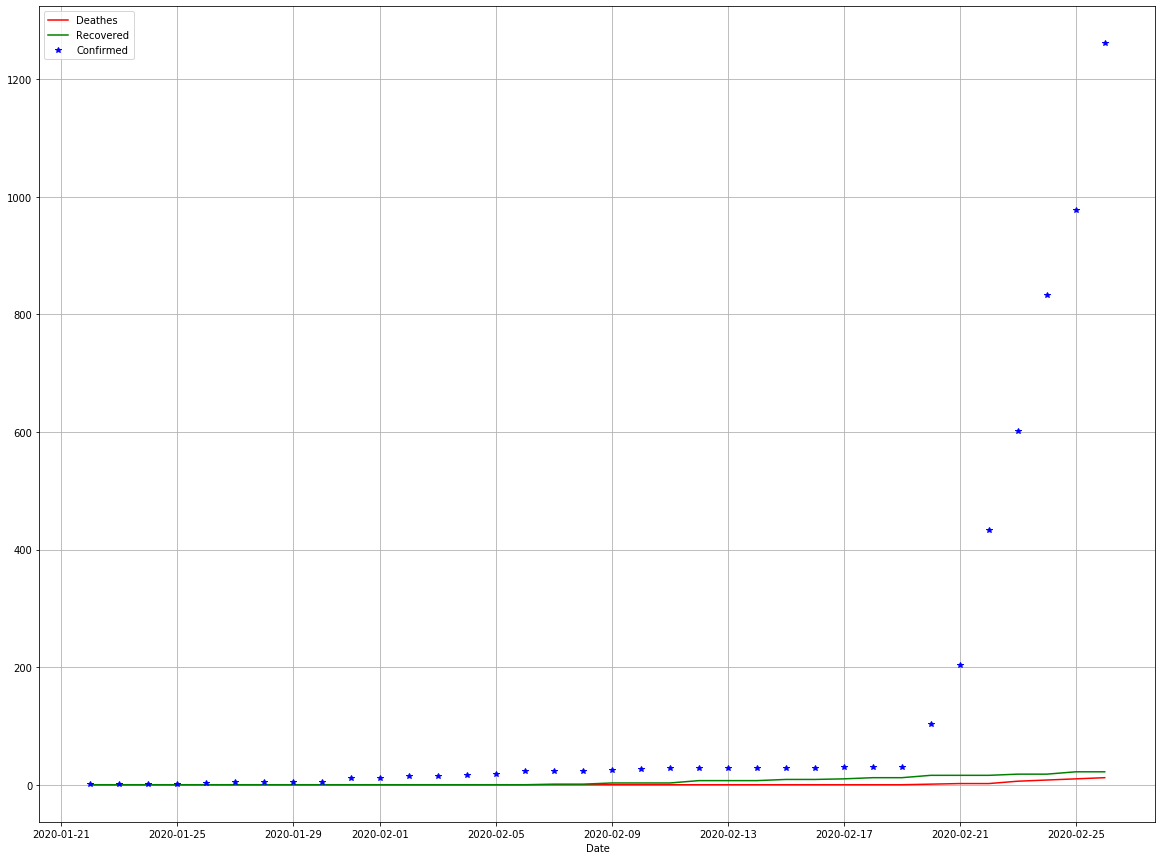

In [0]:
plt.figure(figsize = (20, 15))

plt.plot(location_timeseries['South Korea']['Deaths'], 'r', label = 'Deathes')
plt.plot(location_timeseries['South Korea']['Recovered'], 'g', label = 'Recovered')
plt.plot(location_timeseries['South Korea']['Confirmed'], 'b*', label = 'Confirmed')

plt.xlabel('Date')
plt.legend()
plt.grid()
pass

Резкий прирост количества зараженных приходится на середину и конец февраля. 

### Italy

In [0]:
location_timeseries['Italy']

,Confirmed,Deaths,Recovered
2020-01-22,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN
2020-01-31,2.0,0.0,0.0


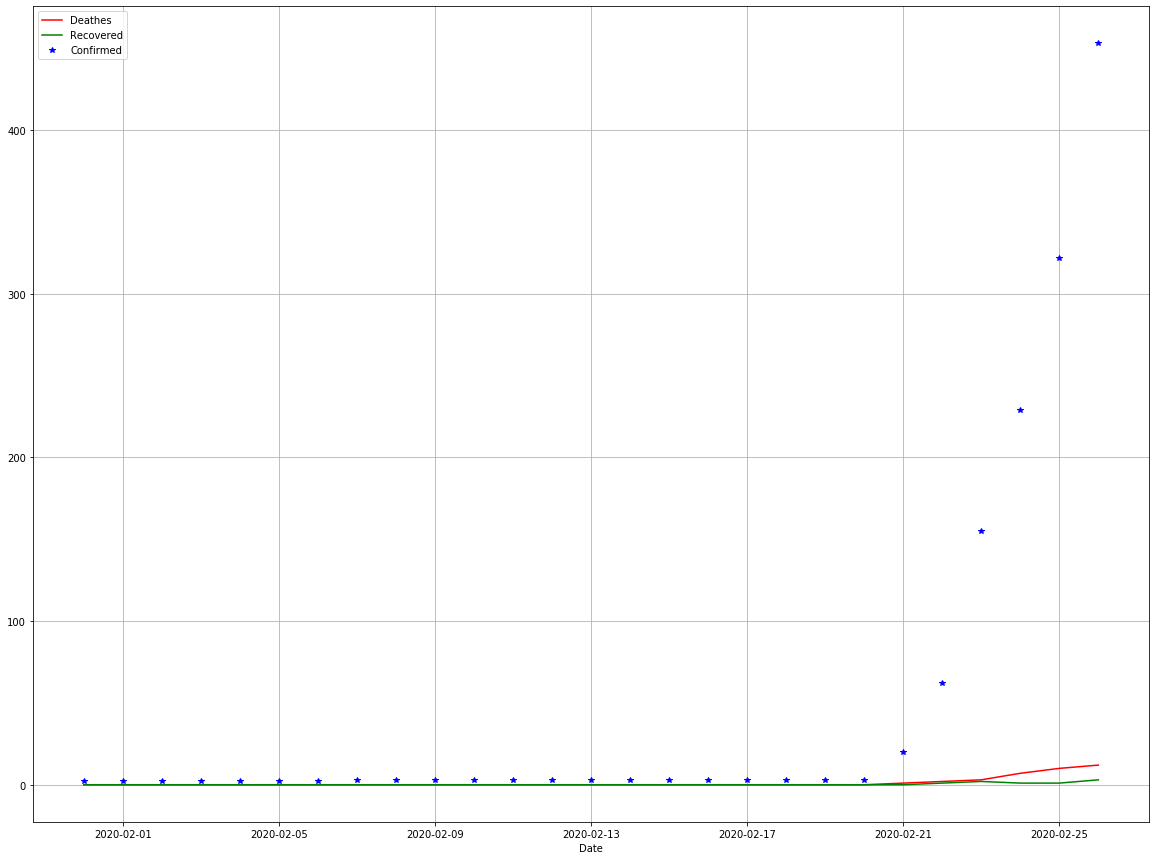

In [0]:
plt.figure(figsize = (20, 15))

plt.plot(location_timeseries['Italy']['Deaths'], 'r', label = 'Deathes')
plt.plot(location_timeseries['Italy']['Recovered'], 'g', label = 'Recovered')
plt.plot(location_timeseries['Italy']['Confirmed'], 'b*', label = 'Confirmed')

plt.xlabel('Date')
plt.legend()
plt.grid()
pass

Темпы роста коронавируса в Италии поражают, с 21 февраля за сутки больше чем в два раза увеличивалось количество заболевших. Это единственная страна в которой на конец февраля количество смертельных исходов превышает число выздоровевших людей. 

### Japan

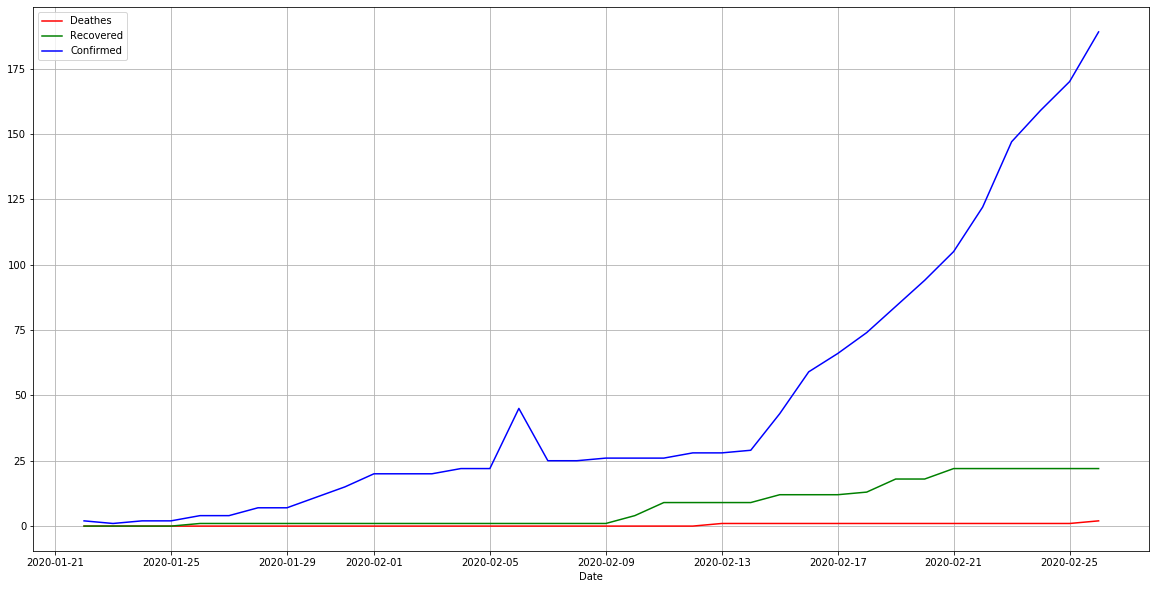

In [0]:
plt.figure(figsize = (20, 10))

plt.plot(location_timeseries['Japan']['Deaths'], 'r', label = 'Deathes')
plt.plot(location_timeseries['Japan']['Recovered'], 'g', label = 'Recovered')
plt.plot(location_timeseries['Japan']['Confirmed'], 'b', label = 'Confirmed')

plt.xlabel('Date')
plt.legend()
plt.grid()
pass

### Thailand

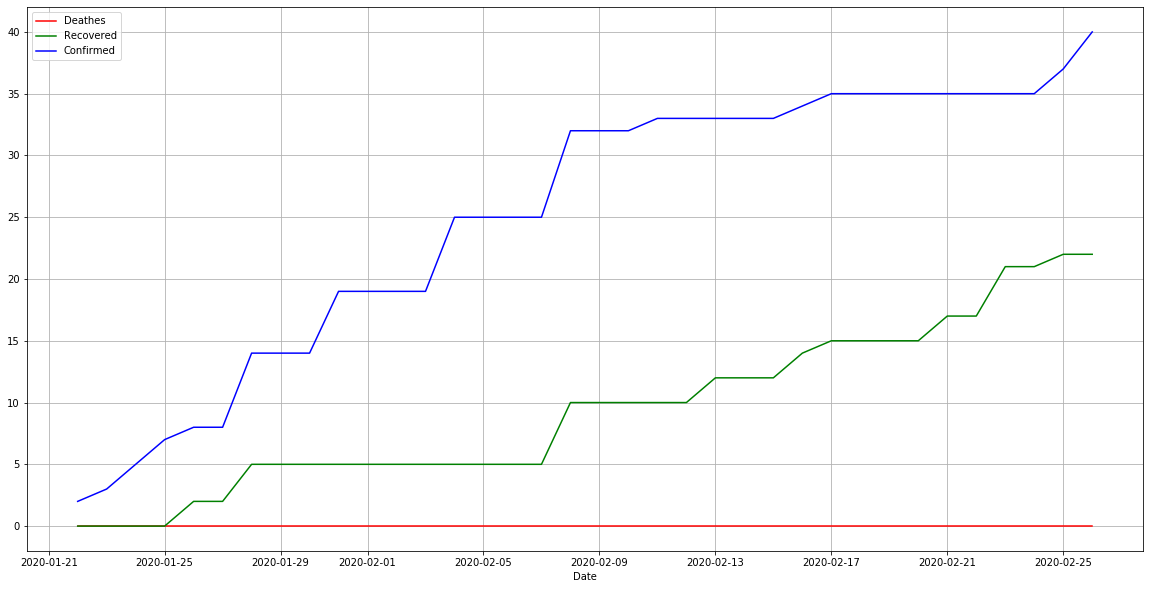

In [0]:
plt.figure(figsize = (20, 10))

plt.plot(location_timeseries['Thailand']['Deaths'], 'r', label = 'Deathes')
plt.plot(location_timeseries['Thailand']['Recovered'], 'g', label = 'Recovered')
plt.plot(location_timeseries['Thailand']['Confirmed'], 'b', label = 'Confirmed')

plt.xlabel('Date')
plt.legend()
plt.grid()
pass

Судя по предоставленным данным, в Тайланде вс довольно хорошо, тк нет смертельных исходов и чуть больше 50% зараженных уже побороли вирус.

### Hong Kong

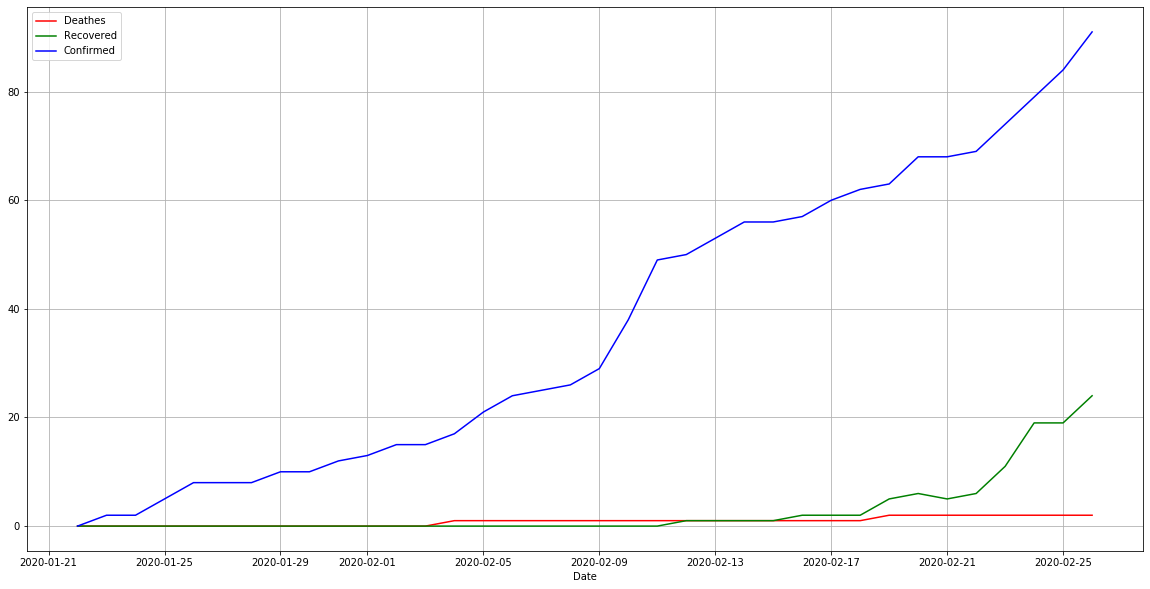

In [0]:
plt.figure(figsize = (20, 10))

plt.plot(location_timeseries['Hong Kong, Hong Kong']['Deaths'], 'r', label = 'Deathes')
plt.plot(location_timeseries['Hong Kong, Hong Kong']['Recovered'], 'g', label = 'Recovered')
plt.plot(location_timeseries['Hong Kong, Hong Kong']['Confirmed'], 'b', label = 'Confirmed')

plt.xlabel('Date')
plt.legend()
plt.grid()
pass

## Geopandas

### Confirmed

In [0]:
world_lines = geopandas.read_file('zip:///content/drive/My Drive/MAG/PythonLibraries/Coronavirus/shapefiles/ne_50m_admin_0_countries.zip')

world = world_lines[(world_lines['POP_EST']>0) & (world_lines['ADMIN']!='Antarctica')]

world = world.rename(columns = {'ADMIN':'name'})

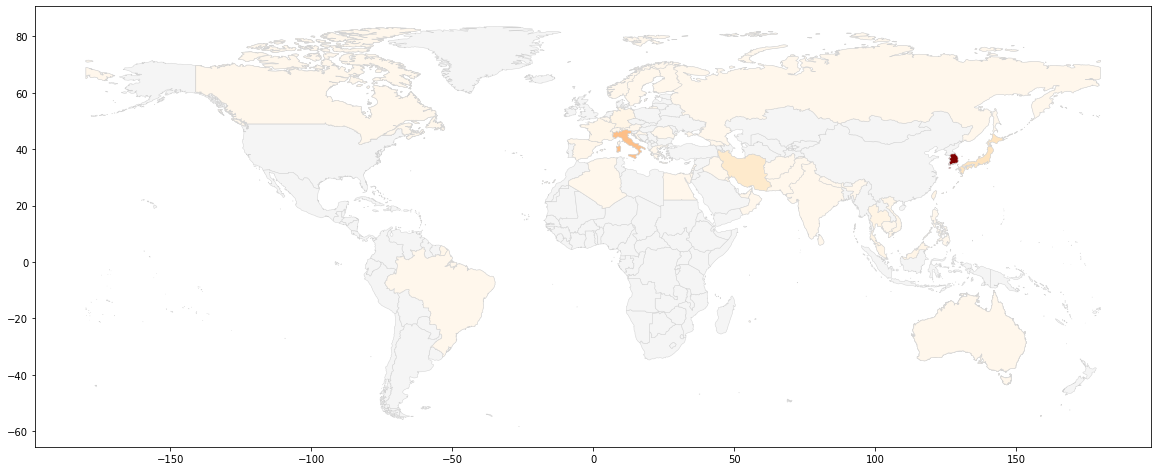

In [0]:
dff = df[df["Date"] == '02-26']
world_ncov = world.merge(dff, left_on='name', right_on='Country/Region')

w_ax = world.plot(color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5, figsize=(20, 14));
world_ncov.plot(ax=w_ax, column='Confirmed', cmap='OrRd', edgecolor = "lightgrey", linewidth = 0.5, figsize=(20, 14));

In [0]:
dff[dff['Country/Region']=="Mainland China"]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
2379,Hubei,Mainland China,2020-02-26,65187.0,2615.0,20969.0,02-26
2380,Guangdong,Mainland China,2020-02-26,1347.0,7.0,851.0,02-26
2381,Henan,Mainland China,2020-02-26,1271.0,19.0,1033.0,02-26
2383,Zhejiang,Mainland China,2020-02-26,1205.0,1.0,867.0,02-26
2384,Hunan,Mainland China,2020-02-26,1016.0,4.0,783.0,02-26
2385,Anhui,Mainland China,2020-02-26,989.0,6.0,744.0,02-26
2386,Jiangxi,Mainland China,2020-02-26,934.0,1.0,719.0,02-26
2387,Shandong,Mainland China,2020-02-26,756.0,6.0,377.0,02-26
2389,Jiangsu,Mainland China,2020-02-26,631.0,0.0,478.0,02-26
2390,Chongqing,Mainland China,2020-02-26,576.0,6.0,384.0,02-26


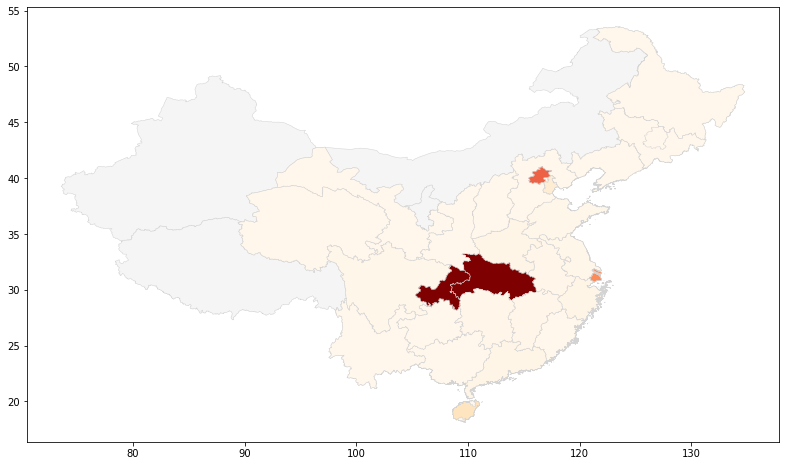

In [0]:
china = world_lines[world_lines['ADMIN']=='China']
# layers: ['gadm36_CHN_0', 'gadm36_CHN_1', 'gadm36_CHN_2', 'gadm36_CHN_3']
china_provinces = geopandas.read_file('/content/drive/My Drive/MAG/PythonLibraries/Coronavirus/shapefiles/gadm36_CHN.gpkg', layer='gadm36_CHN_1')
china_provinces = china_provinces.rename(columns = {'NAME_1':'name'}) 

china_cities = geopandas.read_file('/content/drive/My Drive/MAG/PythonLibraries/Coronavirus/shapefiles/gadm36_CHN.gpkg', layer='gadm36_CHN_2')
china_cities = china_cities.rename(columns = {'NAME_2':'name'}) 

# set to same projection
china_provinces.crs = china.crs
china_cities.crs = china.crs

# merge with coronavirus data
china_provinces_ncov = china_provinces.merge(dff, left_on='name', right_on='Province/State')
china_cities_ncov = china_cities.merge(dff, left_on='name', right_on='Province/State')

# include Hong Kong numbers in Guangdong
g_idx = china_provinces['name']=='Guangdong'
hk_confirmed = dff.loc[dff['Province/State']=='Hong Kong','Confirmed'].values[0]
china_provinces_ncov.loc[g_idx,'Confirmed'] += hk_confirmed

cn_ax = china_provinces.plot(color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5, figsize=(18, 8))
china_provinces_ncov.plot(ax=cn_ax, column='Confirmed', cmap='OrRd', edgecolor = "lightgrey", linewidth = 0.5);
china_cities_ncov.plot(ax=cn_ax, column='Confirmed', cmap='OrRd', edgecolor = "lightgrey", linewidth = 0.5);

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


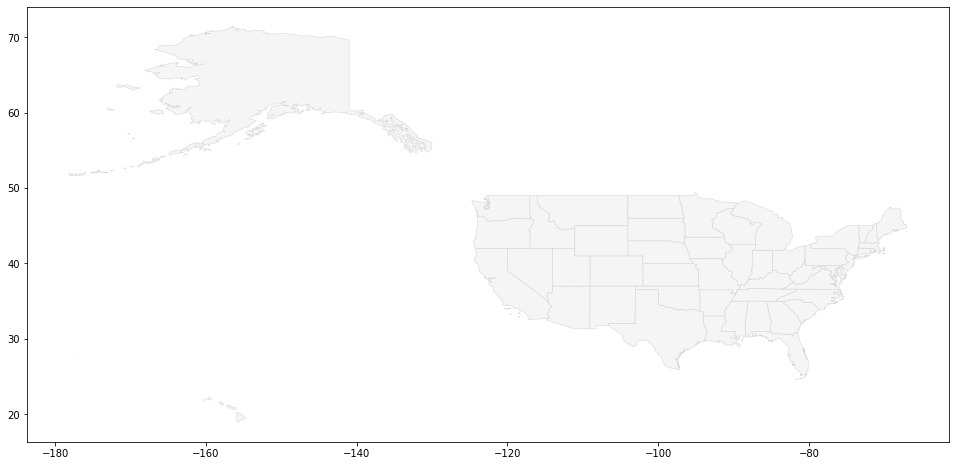

In [0]:
state_lines = geopandas.read_file('zip:///content/drive/My Drive/MAG/PythonLibraries/Coronavirus/shapefiles/ne_50m_admin_1_states_provinces.zip')
us_state_lines = state_lines[state_lines['iso_a2']=='US']

# merge with coronavirus data
us_state_ncov = us_state_lines.merge(dff, left_on='name', right_on='Province/State')

us_ax = us_state_lines.plot(color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5, figsize=(18, 8));
us_state_ncov.plot(ax=us_ax, column='Confirmed', cmap='OrRd', edgecolor = "lightgrey", linewidth = 0.5, figsize=(18, 8));

In [0]:
import math

cols = ['name','Confirmed','geometry']
ncov = pd.concat([world_ncov[cols],us_state_ncov[cols],china_provinces_ncov[cols],china_cities_ncov[cols]],ignore_index=True)

ncov['log_confirmed'] = ncov.apply(lambda x: math.log10(x['Confirmed']), axis=1)
ncov[['name','Confirmed','log_confirmed']].sort_values(by='log_confirmed', ascending=False).head()

,name,Confirmed,log_confirmed
60,Hubei,65187.0,4.814161
53,Guangdong,1438.0,3.157759
59,Henan,1271.0,3.104146
8,South Korea,1261.0,3.100715
74,Zhejiang,1205.0,3.080987


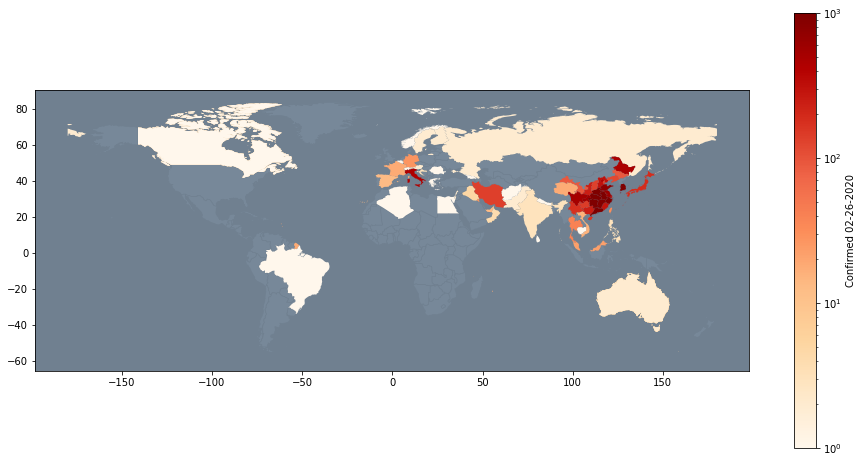

In [0]:
ax = world.plot(
    color = "lightslategray", 
    edgecolor = "slategray", 
    linewidth = 0.5, figsize=(16, 8));
ax.set_facecolor("slategray")
ax.set_clip_on(False)

ncov.plot(
    ax=ax, 
    column='Confirmed', 
    norm=colors.LogNorm(vmin=1, vmax=1000),
    legend=True,
    legend_kwds={'label': "Confirmed 02-26-2020"},
    cmap='OrRd')

Такая ситуация по распространению вируса на самую последнюю дату, которая у нас есть -- 26 февраля. 


## Prepare data by country

In [9]:
abbr = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UK': 'United Kingom',
        'UT': 'Utah',
        'UM': 'Minor Outlying Islands',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming',
        'AB': 'Alberta',
        'MB': 'Manitoba',
        'NB': 'New Brunswick',
        'NL': 'Newfoundland and Labrador',
        'NS': 'Nova Scotia',
        'ON': 'Ontario',
        'PE': 'Prince Edward Island',
        'QC': 'Quebec',
        'SK': 'Saskatchewan',
}

# convert state abbreviations to names
regex = r'^((?:\w+[ \-]?){1,4}), ([A-Z]{,2})$'
def city_state_to_state(row):
    text = row['Province/State']
    if pd.isna(text):
        return text
    
    match = re.match(regex, text)
    if match is None:
        return text
    group = match.groups()
    state = abbr[group[1]]
    return state

df['Province/State'] = df.apply(city_state_to_state, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 0 to 2479
Data columns (total 7 columns):
Province/State    1778 non-null object
Country/Region    2480 non-null object
Last Update       2480 non-null datetime64[ns]
Confirmed         2480 non-null float64
Deaths            2480 non-null float64
Recovered         2480 non-null float64
Date              2480 non-null object
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 135.8+ KB


In [10]:
def create_location(row):
    if pd.isna(row['Province/State']):
        return row['Country/Region']
    else:
        return row['Province/State'] + ', ' + row['Country/Region']
        
df['Location'] = df.apply(create_location, axis=1)
locations = df['Location'].unique().tolist()
len(locations)

106

In [11]:
df['Last Update'] = pd.to_datetime(df['Last Update']).dt.normalize()
dates = df['Last Update'].unique().tolist()
dates.sort()

date_rng = pd.date_range(start=dates[0], end=dates[len(dates)-1], freq='D')
print(len(date_rng))
date_rng

36


DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26'],
              dtype='datetime64[ns]', freq='D')

In [12]:
location_timeseries = {}
location_details = {}
for location in locations:
    values = df[df['Location'] == location]
    ldf = values.set_index('Last Update').resample('D').mean()
    ldf = ldf.reindex(index=date_rng)
    location_timeseries[location] = ldf.fillna(method='ffill')
    #location_timeseries[location] = ldf.interpolate()
    location_details[location] = {
        'Province/State':values.iloc[0]['Province/State'], 
        'Country/Region':values.iloc[0]['Country/Region']}
    
location_timeseries['Hubei, Mainland China']

,Confirmed,Deaths,Recovered
2020-01-22,444.0,17.0,28.0
2020-01-23,444.0,17.0,28.0
2020-01-24,549.0,24.0,31.0
2020-01-25,761.0,40.0,32.0
2020-01-26,1058.0,52.0,42.0
2020-01-27,1423.0,76.0,45.0
2020-01-28,3554.0,125.0,80.0
2020-01-29,3554.0,125.0,88.0
2020-01-30,4903.0,162.0,90.0
2020-01-31,5806.0,204.0,141.0


In [13]:
daily_confirmed = pd.DataFrame(index=date_rng,columns=locations)

for location in locations:
    daily_confirmed[location] = location_timeseries[location]
    
daily_confirmed[['Russia','Japan','Hong Kong, Hong Kong','Hubei, Mainland China']]

,Russia,Japan,"Hong Kong, Hong Kong","Hubei, Mainland China"
2020-01-22,NaN,2.0,0.0,444.0
2020-01-23,NaN,1.0,2.0,444.0
2020-01-24,NaN,2.0,2.0,549.0
2020-01-25,NaN,2.0,5.0,761.0
2020-01-26,NaN,4.0,8.0,1058.0
2020-01-27,NaN,4.0,8.0,1423.0
2020-01-28,NaN,7.0,8.0,3554.0
2020-01-29,NaN,7.0,10.0,3554.0
2020-01-30,NaN,11.0,10.0,4903.0
2020-01-31,2.0,15.0,12.0,5806.0
